In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

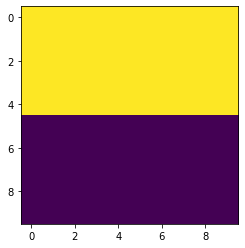

In [44]:
input_image = np.zeros((1,10,10,1))
input_image[0,0:5,:] = 255

plt.imshow(input_image[0])

In [45]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0,0),(pad,pad),(pad,pad), (0,0)), 'constant', constant_values = (0,0))
    return X_pad

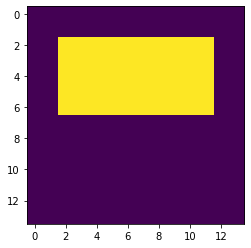

In [46]:
plt.imshow(zero_pad(input_image, 2)[0])

In [47]:
def conv_single_step(a_slice_prev, W, b):
    window = np.sum(a_slice_prev*W)+b.astype(float)
    return window

[[[-0.34385368]]]
Z = [[[-6.99908945]]]


In [48]:
# def conv_forward(A_prev, W, b, hparameters):
#     (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

#     stride = hparameters['stride']
#     pad = hparameters['pad']

#     (f, f, n_C_prev, n_C) = W.shape
#     n_H = int((n_H_prev + 2*pad - f)/stride) + 1
#     n_W =int((n_W_prev + 2*pad - f)/stride) + 1

#     A_prev_pad = zero_pad(A_prev, pad)
#     Z = np.zeros([m, n_H, n_W, n_C])
    
#     for i in range(m):
#         for h in range(0,n_H, stride):
#             for w in range(0, n_W, stride):
#                 for c in range(0, n_C):
#                     a_slice_prev = A_prev_pad[i, h:h+f, w:w+f, :]
#                     # print(conv_single_step(a_slice_prev, W[:,:,:,c], b[:,:,:,c]), W[:, :, :, c], b[:,:,:,c])
#                     Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:,:,:,c])
    
#     assert Z.shape == (m, n_H, n_W, n_C)

#     cache = (Z, W, b, hparameters)

#     return Z, cache

In [52]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    stride = hparameters['stride']
    pad = hparameters['pad']

    (f, f, n_C_prev, n_C) = W.shape
    n_H = int((n_H_prev + 2*pad - f)/stride) + 1
    n_W =int((n_W_prev + 2*pad - f)/stride) + 1

    A_prev_pad = zero_pad(A_prev, pad)
    Z = np.zeros([m, n_H, n_W, n_C])
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i,:,:,:]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h*stride
                    vert_end = h*stride + f
                    horiz_start = w*stride 
                    horiz_end = w*stride + f

                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:,:,:,c])
    
    assert Z.shape == (m, n_H, n_W, n_C)

    cache = (A_prev, W, b, hparameters)

    return Z, cache

In [53]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.048995203528855794
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [51]:
Z.shape

(10, 4, 4, 8)

## LEARNINGS:
* convolution has weight (filter_size,filter_size, no_of_filters_prev_layer, no_of_filters_next_layer)
* Convolution operation takes a filter_size*filter_size*no_of_filters_prev_layer 3D slice, does element wise multiplication with filter_size*filter_size*prev_activation_depth weight. Sum this and add a bias.
* bias is (1,1,1,no_of_filters_next_layer) size
* This gets us one feature map. This operation is repeated with n_C different weights, stacked to get new layer 